In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# random weakly informative features copied from
# https://github.com/ORIE4741/demos/blob/master/double-descent.ipynb
def build_random_features(n=100, d=100, num_informative_features = 20):
    y = np.random.randn(n)
    X = np.random.randn(n, min(d, num_informative_features)) + y.reshape(-1,1)

    if d > num_informative_features:
        X = np.hstack((X, np.random.randn(n,d - num_informative_features)))
    
    return X,y


In [3]:
def eff_dim(x, s=0.1):
    return np.sum(x / (x + s))

In [4]:
def compute_partial_error(d, n=200, l=0.001):
    xtrain, ytrain = build_random_features(n=n, d = d, num_informative_features=1000)
    xtest, ytest = build_random_features(n=n, d = d, num_informative_features=1000)

    w = np.linalg.lstsq(xtrain, ytrain, rcond=None)[0]
    
    alpha = np.linalg.lstsq(xtrain @ xtrain.T +  n * l * np.eye(xtrain.shape[0]), ytrain)[0]
    train_norm = alpha.T @ xtrain @ (xtrain.T @ alpha)
    
    test_error = np.linalg.norm(xtest @ w - ytest) / np.linalg.norm(ytest)
    train_error = np.linalg.norm(xtrain @ w - ytrain) / np.linalg.norm(ytrain)
    
    svs = np.linalg.svd(xtrain, compute_uv=False)
    effective_dimensions = eff_dim(svs**-2, s=l*n)
    
    return test_error, train_error, train_norm**0.5, effective_dimensions

In [5]:
width_sequence = range(5, 400, 2)
errors = [compute_partial_error(d) for d in width_sequence]

/Users/wesleymaddox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


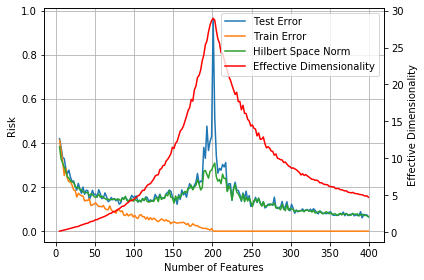

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(width_sequence, [e[0] for e in errors], label='Test Error')
ax.plot(width_sequence, [e[1] for e in errors], label='Train Error')
ax.plot(width_sequence, [e[2] for e in errors], label='Hilbert Space Norm')

ax2 = ax.twinx()
ax2.plot(width_sequence, [e[3] for e in errors], label = 'Effective Dimensionality', color='red')

ax.grid()

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
#ax.legend()

ax.set_ylabel('Risk')
ax.set_xlabel('Number of Features')
ax2.set_ylabel('Effective Dimensionality')
#plt.ylim((0, 0.3))
plt.tight_layout()
plt.savefig('random_featues_double_descent.pdf')

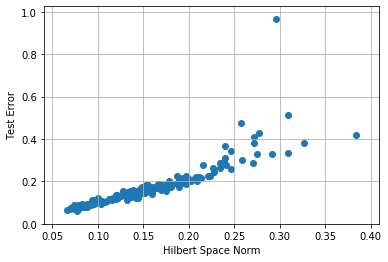

In [7]:
plt.scatter([e[2] for e in errors], [e[0] for e in errors])
plt.xlabel('Hilbert Space Norm')
plt.ylabel('Test Error')
plt.grid()

In [8]:
dimensions = range(10, 1200, 20)
data_points = range(10, 1200, 20)

risk_tensor = np.zeros((3, len(list(dimensions)), len(list(dimensions))))
for i, d in enumerate(dimensions):
    for j, n in enumerate(data_points):
        output = compute_partial_error(d=d, n=n)
        risk_tensor[:, i, j] = output[:-1]

/Users/wesleymaddox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


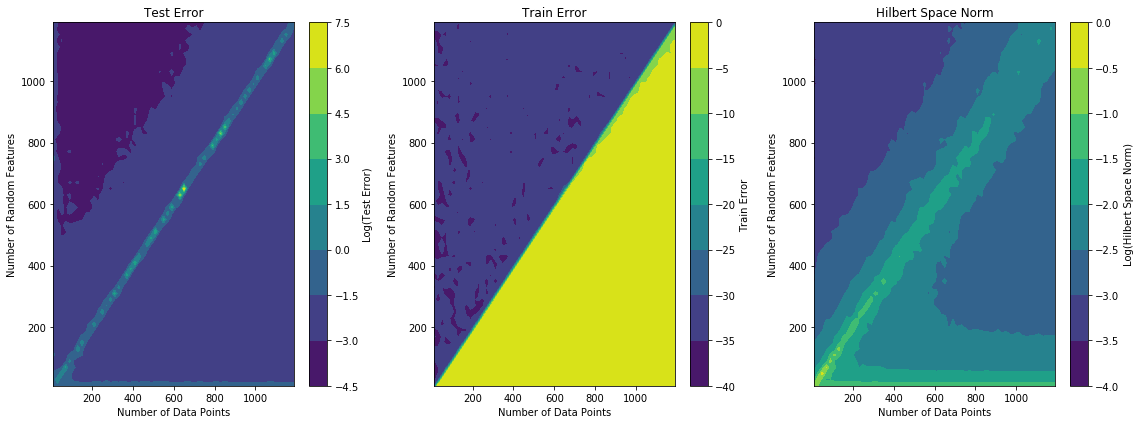

In [9]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))

im = ax[0].contourf(dimensions, data_points, np.log(risk_tensor[0]))
ax[0].set_ylabel('Number of Random Features')
ax[0].set_xlabel('Number of Data Points')
ax[0].set_title('Test Error')
fig.colorbar(im, label='Log(Test Error)', ax=ax[0])

im = ax[1].contourf(dimensions, data_points, np.log(risk_tensor[1]))
ax[1].set_title('Train Error')
ax[1].set_ylabel('Number of Random Features')
ax[1].set_xlabel('Number of Data Points')
fig.colorbar(im, label='Train Error', ax=ax[1])

im = ax[2].contourf(dimensions, data_points, np.log(risk_tensor[2]))
ax[2].set_title('Hilbert Space Norm')
ax[2].set_ylabel('Number of Random Features')
ax[2].set_xlabel('Number of Data Points')
fig.colorbar(im, label='Log(Hilbert Space Norm)',ax=ax[2])

plt.tight_layout()

Text(0, 0.5, 'Number of Random Features')

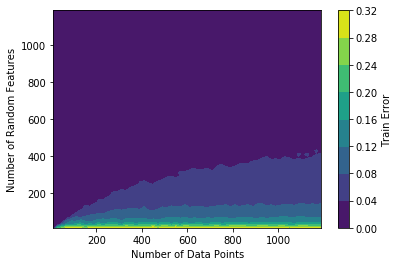

In [10]:
plt.contourf(dimensions, data_points, risk_tensor[1])
plt.colorbar(label='Train Error')
plt.xlabel('Number of Data Points')
plt.ylabel('Number of Random Features')


Text(0, 0.5, 'Number of Random Features')

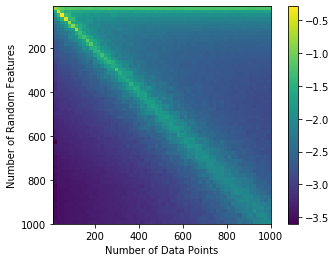

In [11]:
plt.imshow(np.log(risk_tensor[2]), extent=[10, 1000, 1000, 10])
plt.colorbar()
plt.xlabel('Number of Data Points')
plt.ylabel('Number of Random Features')

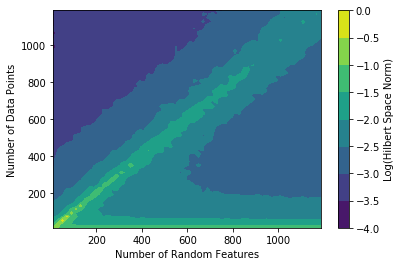

In [12]:
plt.contourf(dimensions, data_points, np.log(risk_tensor[2]))
plt.xlabel('Number of Random Features')
plt.ylabel('Number of Data Points')
plt.colorbar(label='Log(Hilbert Space Norm)')

In [13]:
svds = [np.linalg.svd(build_random_features(n=200, d = d, 
                                            num_informative_features=1000)[0])[1] for d in range(10, 1000, 5)]

Text(0, 0.5, 'Log Eigenvalue')

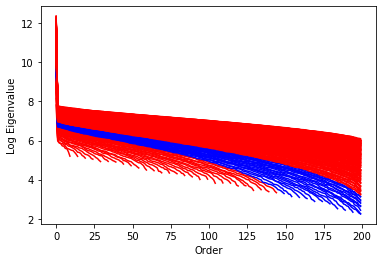

In [14]:
colors = ['blue', 'red']
for s, d in zip(svds, range(10, 1000, 5)):
    plt.plot(2*np.log(s+3), color = colors[d < 150 or d > 250])
plt.xlabel('Order')
plt.ylabel('Log Eigenvalue')